In [2]:
%run ../src/simulation.py

In [3]:
pop_sizes = make_popsizes(1000, 100_000, 2).tolist()

In [4]:
import matplotlib.pyplot as plt
plt.style.use('default')

p = plt.rcParams
p["font.sans-serif"] = ["Atkinson Hyperlegible"]
p["font.weight"] = "light"
colors = "#000000 #E69F00 #56B4E9 #009E73 #F0E442 #0072B2 #D55E00 #D55E00".split()

In [5]:
sample_sizes = 500, 1000, 5000, 10000, 20000
n_sampling_iterations = 100
theta, mu = None, 0.0005

## Stratified Collection Bias

In [6]:
import pickle
import numpy as np

betas = np.linspace(-1, 1, num=5)

with open("../data/exp_stratified-new.pkl", "rb") as f:
    exp_pop = pickle.load(f)

S_true = np.load("../data/S_true.npy")

In [7]:
for pop in exp_pop['sample_size'].mean(axis=0)[:3]:
    print(pop[2].round(2))

[  1.31   2.4    4.64   9.11  17.46  35.36  69.92 138.97]
[  1.93   3.52   6.79  13.5   25.54  51.83 102.6  204.15]
[  3.54   6.56  12.7   25.35  48.47  98.75 194.34 388.85]


In [8]:
for pop in exp_pop['sample_per_pop'].mean(axis=0)[:3]:
    print(pop[2].round(2))

[  1.95   3.93   7.85  15.62  31.41  62.88 125.47 250.88]
[  3.9    7.85  15.63  31.45  62.59 125.4  250.85 502.33]
[  19.57   39.09   78.51  156.89  313.86  628.04 1254.22 2509.83]


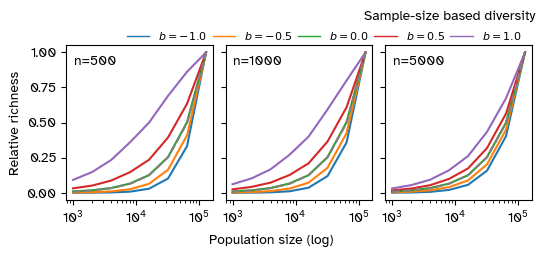

In [ ]:
from matplotlib.lines import Line2D

betas = np.linspace(-1, 1, num=5)

fig, axes = plot_relative_richness(
    exp_pop['sample_size'].mean(axis=0), sample_sizes[:3], pop_sizes, 
    betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$b={beta}$' for beta in betas],
            loc="upper left", ncol=len(betas), bbox_to_anchor=(0.21, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Sample-size based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/stratified-neutral-sampling-small.png", dpi=300, bbox_inches="tight")

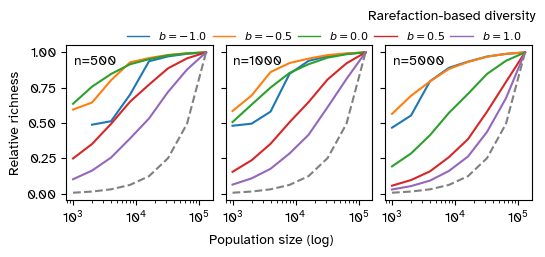

In [11]:
betas = np.linspace(-1, 1, num=5)

fig, axes = plot_relative_richness(
    exp_pop['rarefaction'].mean(axis=0), sample_sizes[:3], pop_sizes, 
    betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$b={beta}$' for beta in betas],
            loc="upper left", ncol=len(betas), bbox_to_anchor=(0.21, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Rarefaction-based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/stratified-rarefaction-sampling-small.png", dpi=300, bbox_inches="tight")

/var/folders/sn/66dvqdn12v9dgr0vrs566dp00000gn/T/ipykernel_88149/2337710233.py:2: RuntimeWarning: Mean of empty slice
  np.nanmean(exp_pop["coverage"], axis=0), sample_sizes[:3], pop_sizes,


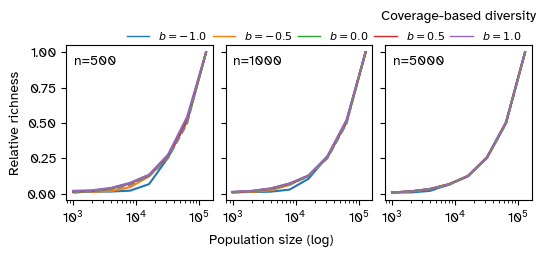

In [13]:
fig, axes = plot_relative_richness(
    np.nanmean(exp_pop["coverage"], axis=0), sample_sizes[:3], pop_sizes, 
    betas, S_true, "Coverage-based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$b={beta}$' for beta in betas],
            loc="upper left", ncol=len(betas), bbox_to_anchor=(0.21, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Coverage-based diversity", x=1, y=1.15, ha="right", size=10)

plt.savefig("../images/stratified-coverage-sampling-small.png", dpi=300, bbox_inches="tight")

In [14]:
data_df, model_runs, estimates_df = analyze_estimation_data(
    sample_sizes, betas, pop_sizes, 
    exp_pop["sample_size"].mean(axis=0), exp_pop["coverage"].mean(axis=0), S_true,
    verbose=True
)

estimates_df

/Users/folgert/projects/coverage-based-standardization/src/simulation.py:219: RuntimeWarning: invalid value encountered in cast
  coverage_estimate = coverage_estimates[i][j][k].astype(int)
/Users/folgert/projects/coverage-based-standardization/src/simulation.py:274: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = fit.params[param_index] if fit is not None else np.nan


,true,sample_based,coverage_based,beta,sample_size
0,0.99987,1.723912,1.288975,-1.0,500
1,0.99987,1.366825,1.127515,-0.5,500
2,0.99987,1.004133,0.991814,0.0,500
3,0.99987,0.719687,0.970746,0.5,500
4,0.99987,0.456666,0.951935,1.0,500
5,0.99987,1.628214,1.204171,-1.0,1000
6,0.99987,1.302505,1.041643,-0.5,1000
7,0.99987,1.012958,0.985970,0.0,1000
8,0.99987,0.773914,0.979628,0.5,1000
9,0.99987,0.540438,0.979117,1.0,1000


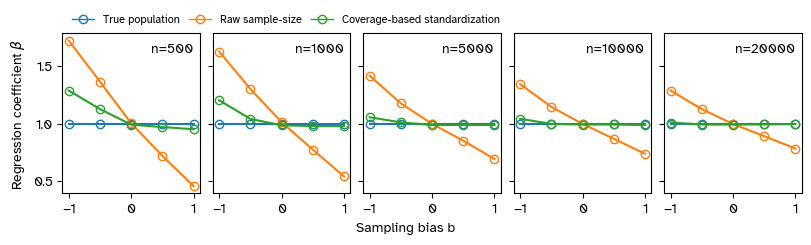

In [ ]:
fig, axes = plt.subplots(ncols=5, figsize=(8, 2.1), constrained_layout=True, sharey=True)
for i, sample_size in enumerate(sample_sizes):
    rows = estimates_df[estimates_df["sample_size"] == sample_size]
    axes[i].plot(betas, rows["true"], '-o', color="C0", label="true", markerfacecolor="none")
    axes[i].plot(betas, rows["sample_based"], '-o', color="C1", label="sample-based", markerfacecolor="none")
    axes[i].plot(betas, rows["coverage_based"], '-o', color="C2", label="coverage-based", markerfacecolor="none")
    axes[i].text(0.95, 0.9, f"n={sample_size}", horizontalalignment='right',
                  verticalalignment='center', transform=axes[i].transAxes, fontsize=10)
axes[0].set_ylabel(r"Regression coefficient $\beta$", size=10)

custom_lines = [Line2D([0], [0], color=f"C{i}", marker='o', lw=1, markerfacecolor="none") for i in range(3)]
fig.legend(custom_lines, ["True population", "Raw sample-size", "Coverage-based standardization"], 
          loc="upper left", ncol=len(betas), bbox_to_anchor=(0.07, 1.12), 
          frameon=False, fontsize=8, columnspacing=0.8)

fig.supxlabel(r"Sampling bias b", size=10)
plt.savefig("../images/regression-analysis.png", dpi=300, bbox_inches='tight');

## Productivity Paradox Sampling

In [16]:
betas = [0, 0.5, 1]
n_sampling_iterations = 100

with open("../data/exp_productivity-new.pkl", "rb") as f:
    exp_prod = pickle.load(f)

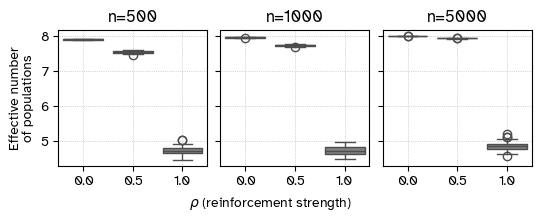

In [1176]:
import pandas as pd
import seaborn as sns

records = []
rho_values = [0, 0.5, 1.0]
for sim in range(exp_prod["statistics"].shape[0]):
    for s_idx in range(exp_prod["statistics"].shape[1]):
        for r_idx, rho in enumerate(rho_values):
            records.append({
                "simulation": sim,
                "sample_size_idx": s_idx,
                "rho": rho,
                "metric": exp_prod["statistics"][sim, s_idx, r_idx]
            })
df = pd.DataFrame(records)

fig, axes = plt.subplots(1, 3, figsize=(5.3, 2.1), sharey=True, constrained_layout=True)

for s_idx, ax in enumerate(axes):
    data = df[df["sample_size_idx"] == s_idx]
    sns.boxplot(x="rho", y="metric", data=data, ax=ax, color='grey')
    ax.set_title(f"n={sample_sizes[s_idx]}")
    ax.set_xlabel("")
    ax.grid(True, linestyle=":", linewidth=0.5)
axes[0].set_ylabel("Effective number\nof populations")
fig.supxlabel(r"$\rho$ (reinforcement strength)", fontsize=10)
plt.savefig("../images/prod-rho-strength.png", dpi=300)

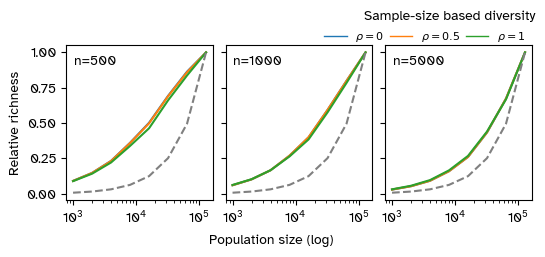

In [17]:
fig, axes = plot_relative_richness(
    np.nanmean(exp_prod["sample_size"], axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\rho={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Sample-size based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/prod-sampling-stratified.png", dpi=300, bbox_inches="tight")

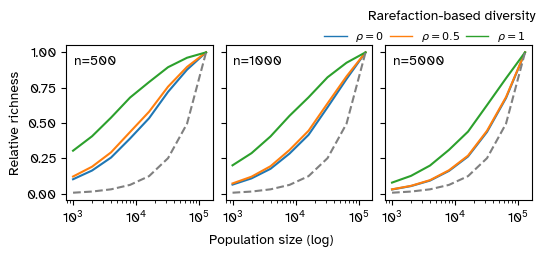

In [18]:
fig, axes = plot_relative_richness(
    np.nanmean(exp_prod["rarefaction"], axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\rho={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Rarefaction-based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/prod-sampling-rarefaction.png", dpi=300, bbox_inches="tight")

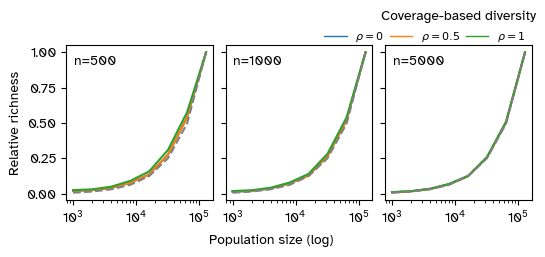

In [19]:
fig, axes = plot_relative_richness(
    np.nanmean(exp_prod["coverage"], axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\rho={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Coverage-based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/prod-sampling-coverage.png", dpi=300, bbox_inches="tight")

## Stromer's Riddle Sampling

In [20]:
betas = [0, 1, 3]
n_sampling_iterations = 100

with open("../data/exp_stromer-new.pkl", "rb") as f:
    exp_strom = pickle.load(f)

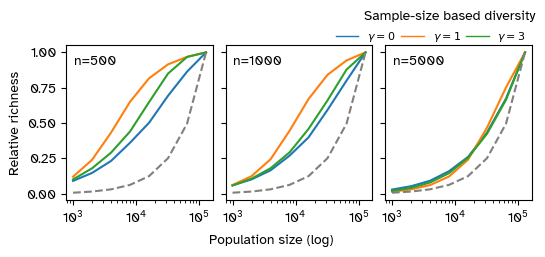

In [21]:
betas = [0, 1, 3]

fig, axes = plot_relative_richness(
    exp_strom["sample_size"].mean(axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\gamma={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Sample-size based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/strom-sampling-raw-small.png", dpi=300, bbox_inches="tight")

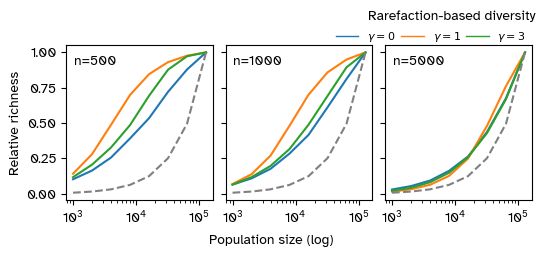

In [22]:
fig, axes = plot_relative_richness(
    exp_strom["rarefaction"].mean(axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Sample-size based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\gamma={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Rarefaction-based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/strom-sampling-rarefaction-small.png", dpi=300, bbox_inches="tight")

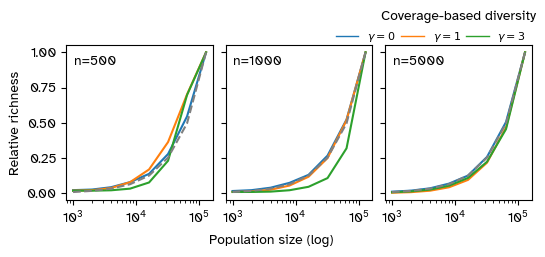

In [23]:
fig, axes = plot_relative_richness(
    np.nanmean(exp_strom["coverage"], axis=0), sample_sizes[:3], 
    pop_sizes, betas, S_true, "Coverage-based diversity", figsize=(5.3, 2.1), ncols=3, nrows=1)
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=1) for i in range(len(betas))]
fig.legend(custom_lines, [fr'$\gamma={beta}$' for beta in betas],
            loc="upper right", ncol=len(betas), bbox_to_anchor=(1, 1.1),
            frameon=False, fontsize=8, columnspacing=0.5)
fig.suptitle("Coverage-based diversity", x=1, y=1.15, ha="right", size=10)
plt.savefig("../images/strom-sampling-coverage-small.png", dpi=300, bbox_inches="tight")